# Activitat 1: Python i Data Science

# **Exploració de la base de dades DrugCentral**

## Bioinformàtica - UF3 

    
+ **Nom estudiant:**
+ **Data d'entrega:** Diumenge 18 de Desembre 2022

*NOTA1: Per cada dia d'entrega més tard es descomptarà un 10% de la nota de la pràctica.*

*NOTA2: L'script s'ha d'executar sense errors i produir els resultats, fitxers i figures que es demanen. És aconsellable abans d'entregar reiniciar el kernel del notebook (Kernel > Restart Kernel) i comprovar que totes les cel·les del notebook s'executen sense errors una rere l'altre.* 
***

**[DrugCentral](https://drugcentral.org/)**  és  una  base  de  dades  que  conté  informació  sobre  fàrmacs  elaborada  i mantinguda per la Divisió d’Informàtica Translacional de la Universitat de Nou Mèxic. Entre les seves dades, ens podem descarregar el fitxer `drug_target_interaction.tsv` (el teniu al MOODLE a l’apartat de l’Activitat 1). Aquesta taula conté dades d’interacció entre els fàrmacs i el seu lloc d'unió molecular, que són les proteïnes, a més d'altres camps com a quin organisme s'ha testejat, codis d'accès, etc. 

Els fàrmacs són **molècules petites** que **interaccionen** amb unes macromolècules pròpies del cos anomenades **proteïnes** i en modifiquen la seva funció aconseguint així un efecte terapèutic. Les proteïnes són molt diverses i participen en moltes funcions, entre les quals destaquen l'acceleració de reaccions (enzims) i reconeixement de substàncies (anticossos i receptors). 

L’objectiu d’aquesta activitat és utilitzar les llibreries de python que hem après per a explorar el contingut d’aquesta base de dades i extreure’n informació. Recordeu  que  jupyter-lab  permet crear cel·les  en  markdown  on  podeu explicar què esteu fent i quins resultats que heu obtingut. A algunes solucions es poden arribar aplicant diferents estratègies. 

In [4]:
#Importació dels mòduls
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Neteja i preparació de la base de dades

**a) Importar el _dataframe_ amb el qual es treballarà les dades de DrugCentral**

In [5]:
df = pd.read_csv("drug_target_interaction.tsv", sep="\t")
df

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
0,levobupivacaine,4,Sodium channel protein type 4 subunit alpha,Ion channel,P35499,SCN4A,SCN4A_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,1.0,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,BLOCKER,Tclin,Homo sapiens
1,levobupivacaine,4,Cytochrome P450 2D6,Enzyme,P10635,CYP2D6,CP2D6_HUMAN,6.706859,NaN,IC50,"DRUGMATRIX: CYP450, 2D6 enzyme inhibition (sub...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
2,levobupivacaine,4,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,4.890000,NaN,IC50,Inhibition of wild-type human ERG channel expr...,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tclin,Homo sapiens
3,levobupivacaine,4,Potassium voltage-gated channel subfamily D me...,Ion channel,Q9UK17,KCND3,KCND3_HUMAN,4.500000,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
4,levobupivacaine,4,Prostaglandin E2 receptor EP1 subtype,GPCR,P34995,PTGER1,PE2R1_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17385,tucatinib,5389,Receptor tyrosine-protein kinase erbB-4,Kinase,Q15303,ERBB4,ERBB4_HUMAN,6.500000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed/32241871,NaN,INHIBITOR,Tclin,Homo sapiens
17386,pemigatinib,5390,Fibroblast growth factor receptor 1,Kinase,P11362,FGFR1,FGFR1_HUMAN,9.400000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
17387,pemigatinib,5390,Fibroblast growth factor receptor 2,Kinase,P21802,FGFR2,FGFR2_HUMAN,9.300000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
17388,pemigatinib,5390,Fibroblast growth factor receptor 3,Kinase,P22607,FGFR3,FGFR3_HUMAN,9.000000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens


**b) Mostra la següent informació:** [0.5 punts]
- Nombre de files i columnes.
- Nom de les variables.
- Nombre de _missing values (NA)_ a cada una de les columnes.

In [10]:
# Nombre de files i columnes.
print("Nombre de files i columnes.")
print("files:", df.shape[0])
print("columnes:", df.shape[1])

# Nom de les variables.
print("\n\n\nNom de les variables:")
print(df.columns)

# Nombre de missing values (NA) a cada una de les columnes.
print("\n\n\nNumero de NA:\n", df.isna().sum())

Nombre de files i columnes.
files: 17390
columnes: 20



Nom de les variables:
Index(['DRUG_NAME', 'STRUCT_ID', 'TARGET_NAME', 'TARGET_CLASS', 'ACCESSION',
       'GENE', 'SWISSPROT', 'ACT_VALUE', 'ACT_UNIT', 'ACT_TYPE', 'ACT_COMMENT',
       'ACT_SOURCE', 'RELATION', 'MOA', 'MOA_SOURCE', 'ACT_SOURCE_URL',
       'MOA_SOURCE_URL', 'ACTION_TYPE', 'TDL', 'ORGANISM'],
      dtype='object')



Numero de NA:
 DRUG_NAME             0
STRUCT_ID             0
TARGET_NAME           0
TARGET_CLASS          0
ACCESSION           139
GENE                464
SWISSPROT           139
ACT_VALUE          1722
ACT_UNIT          17390
ACT_TYPE           1721
ACT_COMMENT        5738
ACT_SOURCE            0
RELATION           1978
MOA               14638
MOA_SOURCE        14638
ACT_SOURCE_URL     6139
MOA_SOURCE_URL    14649
ACTION_TYPE       13391
TDL                4722
ORGANISM            139
dtype: int64


**c) De la base de dades DrugCentral, només considerarem les proteïnes humanes i els fàrmacs que tinguin definit un valor d’activitat (columna = `ACT_VALUE`). Mostra el nombre de files i columnes un cop filtrat.** _Nota: la resta d'exercicis es faran a partir del resultat d'aquest filtre_ [0.5 punts]

In [15]:
df_filtered = df[(df['ORGANISM'] == 'Homo sapiens') & df['ACT_VALUE'].notnull()]
df_filtered

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
1,levobupivacaine,4,Cytochrome P450 2D6,Enzyme,P10635,CYP2D6,CP2D6_HUMAN,6.706859,NaN,IC50,"DRUGMATRIX: CYP450, 2D6 enzyme inhibition (sub...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
2,levobupivacaine,4,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,4.890000,NaN,IC50,Inhibition of wild-type human ERG channel expr...,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tclin,Homo sapiens
3,levobupivacaine,4,Potassium voltage-gated channel subfamily D me...,Ion channel,Q9UK17,KCND3,KCND3_HUMAN,4.500000,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
5,levobupivacaine,4,Sodium channel protein type 1 subunit alpha,Ion channel,P35498,SCN1A,SCN1A_HUMAN,5.790000,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
9,(S)-nitrendipine,6,Intermediate conductance calcium-activated pot...,Ion channel,O15554,KCNN4,KCNN4_HUMAN,7.600000,NaN,IC50,NaN,IUPHAR,=,NaN,NaN,NaN,NaN,BLOCKER,Tchem,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17385,tucatinib,5389,Receptor tyrosine-protein kinase erbB-4,Kinase,Q15303,ERBB4,ERBB4_HUMAN,6.500000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed/32241871,NaN,INHIBITOR,Tclin,Homo sapiens
17386,pemigatinib,5390,Fibroblast growth factor receptor 1,Kinase,P11362,FGFR1,FGFR1_HUMAN,9.400000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
17387,pemigatinib,5390,Fibroblast growth factor receptor 2,Kinase,P21802,FGFR2,FGFR2_HUMAN,9.300000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
17388,pemigatinib,5390,Fibroblast growth factor receptor 3,Kinase,P22607,FGFR3,FGFR3_HUMAN,9.000000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens


**d) Per quants fàrmacs (columna=`drugs`) hi ha dades? I per a quantes proteïnes (columna=`targets`)?** [0.5 punts] 

In [17]:
# Nombre de fàrmacs amb dades (columna=drugs)
num_drugs = df_filtered['DRUG_NAME'].nunique()

# Nombre de proteïnes amb dades (columna=targets)
num_targets = df_filtered['TARGET_NAME'].nunique()

print(f"Nombre de fàrmacs amb dades: {num_drugs}")
print(f"Nombre de proteïnes amb dades: {num_targets}")

Nombre de fàrmacs amb dades: 1767
Nombre de proteïnes amb dades: 1357


## 2. Exploració de la base de dades

**a) Quin és el fàrmac amb més interaccions? Cerqueu per a què serveix aquest fàrmac** [0.5 punts] 

Considerem cada interacció quan es testeja un fàrmac amb una proteïna diferent. Com més alt és el valor d'afinitat (unitats en -log[M]), voldrà dir que la interacció és més forta i per tant, que el fàrmac té una forta atracció per la proteïna. 

In [36]:
# Agrupar per fàrmac i comptar el nombre d'interaccions per cada fàrmac
interactions_count = df_filtered['DRUG_NAME'].value_counts()

# Obtenir el fàrmac amb més interaccions
most_interactions_drug = interactions_count.idxmax()
num_interactions = interactions_count.max()

print(f"El fàrmac amb més interaccions és: {most_interactions_drug}")
print(f"Nombre total d'interaccions: {num_interactions}\n")
print(f"Cerca de {most_interactions_drug}:")
# Els farmacs el buco a DrugBank
print("Sunitinib is a receptor tyrosine kinase inhibitor and chemotherapeutic agent used for the treatment of renal cell carcinoma (RCC) and imatinib-resistant gastrointestinal stromal tumor (GIST).")

El fàrmac amb més interaccions és: sunitinib
Nombre total d'interaccions: 263

Cerca de sunitinib:
Sunitinib is a receptor tyrosine kinase inhibitor and chemotherapeutic agent used for the treatment of renal cell carcinoma (RCC) and imatinib-resistant gastrointestinal stromal tumor (GIST).


**b) I la proteïna amb més fàrmacs associats? Cerqueu què fa aquesta proteïna al nostre organisme.** [0.5 punts] 

In [37]:
# Agrupar per proteïna i comptar el nombre de fàrmacs associats a cada proteïna
proteins_count = df_filtered['TARGET_NAME'].value_counts()

# Obtenir la proteïna amb més fàrmacs associats
most_associated_protein = proteins_count.idxmax()
num_associated_drugs = proteins_count.max()

print(f"La proteïna amb més fàrmacs associats és: {most_associated_protein}")
print(f"Nombre total de fàrmacs associats: {num_associated_drugs}")
print(f"Cerca de {most_associated_protein}:")
# Les proteïnes les bsuco a uniprot
print("General Function: Acts as a receptor for serotonin, a neurotransmitter involved in neural activity, perception, cognition, and mood regulation.")

La proteïna amb més fàrmacs associats és: 5-hydroxytryptamine receptor 2A
Nombre total de fàrmacs associats: 169
Cerca de 5-hydroxytryptamine receptor 2A:
General Function: Acts as a receptor for serotonin, a neurotransmitter involved in neural activity, perception, cognition, and mood regulation.


**c) Les interaccions es classifiquen segons si estan involucrades en el __mecanisme d’acció__ del fàrmac, és a dir, si aquesta interacció és la responsable del seu efecte terapèutic. A la columna `MOA` (Mechanism Of Action) s'indica amb un 1 si la interacció correspont a l'efecte terapèutic. Per tant, repetiu els dos apartats anteriors per a determinar quin fàrmac i proteïna tenen més interaccions si només tenim en compte les interaccions involucrades en el `MOA`.** [1 punt]

In [34]:
# Filtrar per interaccions involucrades en el MOA (MOA = 1)
df_moa = df_filtered[df_filtered['MOA'] == 1]

# Trobar el fàrmac amb més interaccions en el MOA
most_interactions_drug_moa = df_moa['DRUG_NAME'].value_counts().idxmax()
num_interactions_moa_drug = df_moa['DRUG_NAME'].value_counts().max()

print(f"El fàrmac amb més interaccions en el MOA és: {most_interactions_drug_moa}")
print(f"Nombre total d'interaccions en el MOA: {num_interactions_moa_drug}")
print(f"Cerca de {most_interactions_drug_moa}:")
print("For use in the treatment of duodenal ulcers, as a diuretic, and in the treatment of glaucoma, and may also be useful in the treatment of seizures associated with epilepsy.")

# Trobar la proteïna amb més fàrmacs associats en el MOA
most_associated_protein_moa = df_moa['TARGET_NAME'].value_counts().idxmax()
num_associated_drugs_moa = df_moa['TARGET_NAME'].value_counts().max()

print(f"\nLa proteïna amb més fàrmacs associats en el MOA és: {most_associated_protein_moa}")
print(f"Nombre total de fàrmacs associats en el MOA: {num_associated_drugs_moa}")
print(f"Cerca de {most_associated_protein_moa}:")
print("this protein exhibits a multifaceted role in regulating metabolic processes, responding to stress, and influencing cellular activities related to insulin sensitivity, obesity, mitochondrial function, and musculoskeletal health.")

El fàrmac amb més interaccions en el MOA és: ethoxzolamide
Nombre total d'interaccions en el MOA: 13
Cerca de ethoxzolamide:
For use in the treatment of duodenal ulcers, as a diuretic, and in the treatment of glaucoma, and may also be useful in the treatment of seizures associated with epilepsy.

La proteïna amb més fàrmacs associats en el MOA és: D(2) dopamine receptor
Nombre total de fàrmacs associats en el MOA: 54
Cerca de D(2) dopamine receptor:
this protein exhibits a multifaceted role in regulating metabolic processes, responding to stress, and influencing cellular activities related to insulin sensitivity, obesity, mitochondrial function, and musculoskeletal health.


**d) Cada proteïna, segons la seva funció, està assignada a una classe (columna=`TARGET_CLASS`). Quantes classes hi ha i quines són? Quantes proteïnes té assignada cada classe (noms de les proteïnes sense repetir)?** [1 punt]

In [49]:
# Comptar les proteïnes per classe
proteins_per_class = df_filtered.groupby('TARGET_CLASS')['TARGET_NAME'].nunique()

# Nombres de classes i noms de les proteïnes per classe
num_classes = proteins_per_class.shape[0]
class_names = proteins_per_class.index.tolist()
proteins_count_per_class = proteins_per_class.tolist()

# Mostrar els resultats
print(f"Hi ha {num_classes} classes:")
for i in range(num_classes):
    print(f"Classe {i}: {class_names[i]}, Proteïnes assignades: {proteins_count_per_class[i]}")

Hi ha 21 classes:
Classe 0: Adhesion, Proteïnes assignades: 5
Classe 1: Antibody, Proteïnes assignades: 1
Classe 2: CD molecules, Proteïnes assignades: 1
Classe 3: Cytokine, Proteïnes assignades: 14
Classe 4: Cytosolic other, Proteïnes assignades: 19
Classe 5: Enzyme, Proteïnes assignades: 377
Classe 6: GPCR, Proteïnes assignades: 174
Classe 7: Glycoprotein, Proteïnes assignades: 1
Classe 8: Ion channel, Proteïnes assignades: 160
Classe 9: Kinase, Proteïnes assignades: 405
Classe 10: Membrane other, Proteïnes assignades: 1
Classe 11: Membrane receptor, Proteïnes assignades: 20
Classe 12: Nuclear hormone receptor, Proteïnes assignades: 28
Classe 13: Nuclear other, Proteïnes assignades: 2
Classe 14: Secreted, Proteïnes assignades: 12
Classe 15: Structural, Proteïnes assignades: 6
Classe 16: Surface antigen, Proteïnes assignades: 6
Classe 17: Transcription factor, Proteïnes assignades: 6
Classe 18: Transporter, Proteïnes assignades: 63
Classe 19: Tumour-associated antigen, Proteïnes assig

**e) Feu un gràfic de barres (bar plot) on es mostri aquesta informació (x=`TARGET_CLASS`; y = nº de proteïnes corresponent a cada classe).** Recordeu que un gràfic s'ha de poder interpretar per si mateix, així que incloeu totes les etiquetes que considereu necessàries i formatejeu-lo al vostre gust.  [1 punt]

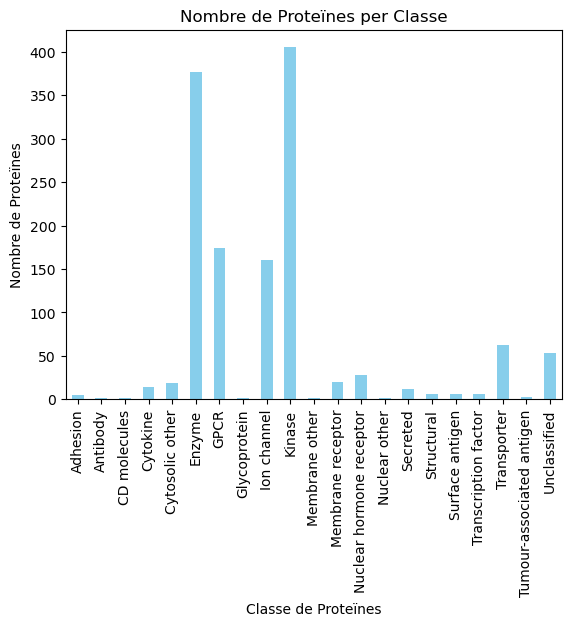

In [50]:
proteins_per_class
proteins_per_class.plot(kind='bar', color='skyblue')

# Afegir etiquetes i títol al gràfic
plt.xlabel('Classe de Proteïnes')
plt.ylabel('Nombre de Proteïnes')
plt.title('Nombre de Proteïnes per Classe')

# Mostrar el gràfic
plt.show()

## 3. Manipulació de les dades

**a) És conegut que els fàrmacs generalment interaccionen amb més d’una proteïna, una de les raons per la qual tots els fàrmacs poden tenir efectes secundaris. Amb quantes proteïnes de mitjana interaccionen els fàrmacs? És el mateix valor per a totes les classes de proteïna ?**  _Nota: Per obtenir el valor mitjà per una determinada classe considereu únicament les interaccions que involucren a aquella classe._ [1.5 punt]

In [53]:
# Calcular la mitjana del nombre de proteïnes amb les quals interaccionen els fàrmacs
average_interactions_per_drug = round(df_filtered.groupby('DRUG_NAME')['TARGET_NAME'].nunique().mean(), 2)

print(f"Mitjana d'interaccions per fàrmac: {average_interactions_per_drug}")

# Calcular la mitjana per classe de proteïna
average_interactions_per_class = round(df_filtered.groupby('TARGET_CLASS')['TARGET_NAME'].nunique().mean(), 2)

print(f"Mitjana d'interaccions per classe de proteïna: {average_interactions_per_class}")

Mitjana d'interaccions per fàrmac: 6.45
Mitjana d'interaccions per classe de proteïna: 64.62


**b) Quin és el perfil dels valors d’afinitat que hi ha en les interaccions (columna = `ACT_VALUE`)? Hi ha alguna diferència entre les interaccions involucrades en el mecanisme d’acció dels fàrmacs i la resta (output de la pregunta 2.C)? Il·lustreu-ho amb un gràfic, per exemple, un histograma on es mostri el perfil dels valors d'afinitat generals i els valors implicats en el MOA.** [1 punt]

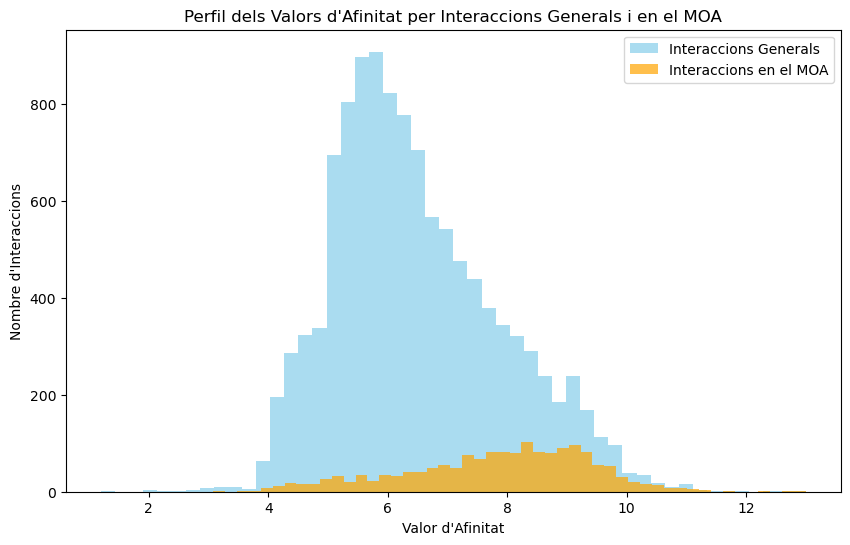

In [54]:
# Filtrar les interaccions en general
general_interactions = df_filtered['ACT_VALUE'].dropna()

# Filtrar les interaccions involucrades en el MOA
moa_interactions = df_filtered[df_filtered['MOA'] == 1]['ACT_VALUE'].dropna()

# Crear l'histograma
plt.figure(figsize=(10, 6))
plt.hist(general_interactions, bins=50, alpha=0.7, label='Interaccions Generals', color='skyblue')
plt.hist(moa_interactions, bins=50, alpha=0.7, label='Interaccions en el MOA', color='orange')

# Afegir etiquetes i títol al gràfic
plt.xlabel('Valor d\'Afinitat')
plt.ylabel('Nombre d\'Interaccions')
plt.title('Perfil dels Valors d\'Afinitat per Interaccions Generals i en el MOA')

# Afegir llegenda
plt.legend()

# Mostrar el gràfic
plt.show()

## 4. Anàlisi d'una proteïna

S’ha observat que els fàrmacs que actuen sobre una proteïna anomenada hERG (gen KCNH2) poden produir efectes adversos seriosos. Aquesta proteïna és un canal de ions de potassi i alterar la seva funció pot produir el que es coneix com _torsade des pointes_, una alteració de l’electrocardiograma que pot degenerar en fibril·lació ventricular i mort sobtada.

**a) Quants fàrmacs hi ha amb activitat per aquesta proteïna? (columna = `GENE`)** [0.5 punts]

In [55]:
# Filtrar les files on la columna 'GENE' és igual a 'KCNH2' (proteïna hERG)
herg_drugs = df_filtered[df_filtered['GENE'] == 'KCNH2']

# Obtenir el nombre de fàrmacs amb activitat per a la proteïna hERG
num_herg_drugs = herg_drugs['DRUG_NAME'].nunique()

print(f"Hi ha {num_herg_drugs} fàrmacs amb activitat per a la proteïna hERG.")

Hi ha 152 fàrmacs amb activitat per a la proteïna hERG.


**b) Com a regla general sabem que una activitat pot començar a ser rellevant si és superior a 5 (equivalent a 10 μM) (Recordem que com més alt és el logaritme del valor d'activitat, més forta és la interacció). Genereu un fitxer amb les interaccions sospitoses (activitat >=5) de produir _torsade des pointes_ ordenat per la seva afinitat pel canal hERG de més gran a més petit.** [1 punt]

In [57]:
# Filtrar les interaccions amb activitat >= 5 per al canal hERG
suspicious_interactions = df_filtered[(df_filtered['GENE'] == 'KCNH2') & (df_filtered['ACT_VALUE'] >= 5)]

# Ordenar les interaccions per afinitat de més gran a més petit
sorted_interactions = suspicious_interactions.sort_values(by='ACT_VALUE', ascending=False)

# Guardar el DataFrame amb les interaccions sospitoses en un fitxer CSV
sorted_interactions.to_csv('interaccions_sospitoses_hERG.csv', index=False)

**c) Comproveu si és veritat per als tres primers fàrmacs obtinguts cercant bibliografia.** [0.5 punts]

1. Astemizole (ACT_VALUE=9.04)
    Astemizole is a long-acting, non-sedating second generation antihistamine used in the treatment of allergy symptoms. It was withdrawn from market by the manufacturer in 1999 due to the potential to cause arrhythmias at high doses, especially when when taken with CYP inhibitors or grapefruit juice.
    Summary: It is a second generation antihistamine used to treat allergy symptoms.
2. Sertindole (ACT_VALUE=8.57)
   Sertindole, a neuroleptic, is one of the newer antipsychotic medications available. Serdolect is developed by the Danish pharmaceutical company H. Lundbeck. It is a phenylindole derivative used in the treatment of schizophrenia. It was first marketed in 1996 in several European countries before being withdrawn two years later because of numerous cardiac adverse effects. It has once again been approved and should soon be available on the French and Australian market.
    Summary: It is an atypical antipsychotic indicated in the treatment of schizophrenia.
3. Benperidol (ACT_VALUE=8.47)
   Benperidol has been used in trials studying the treatment of Dementia, Depression, Schizophrenia, Anxiety Disorders, and Psychosomatic Disorders, among others.